# The Great Indian Hiring Hackathon

## Exploratory Data Analysis

In [1]:
# IMport the required libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder


### Importing the train and test sets

In [2]:
# Import the training data
train = pd.read_csv("../Dataset/Train.csv").set_index("TimeStamp")
train.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,Date,Traffic_Vol
TimeStamp,,,,,,,,,
02/10/08 9:00,NaN,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02/10/08,5555
02/10/08 10:00,NaN,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08,4525
02/10/08 11:00,NaN,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08,4772
02/10/08 12:00,NaN,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08,5031
02/10/08 13:00,NaN,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08,4928


In [3]:
# Import the test set
test = pd.read_csv("../Dataset/Test.csv").set_index("TimeStamp")

test.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,Date,Traffic_Vol
TimeStamp,,,,,,,,,
01/07/14 0:00,NaN,297.65,0.0,0,1,Clear skies,Clear skies,01/07/14,NaN
01/07/14 1:00,NaN,297.45,0.0,0,1,Clear skies,Clear skies,01/07/14,NaN
01/07/14 2:00,NaN,296.75,0.0,0,1,Rainfall,Soft rain,01/07/14,NaN
01/07/14 3:00,NaN,296.42,0.0,0,1,Rainfall,Steady rain,01/07/14,NaN
01/07/14 4:00,NaN,295.56,0.0,0,40,Rainfall,Soft rain,01/07/14,NaN


In [4]:
# change the index to date time format for training data
train.index = pd.to_datetime(train.index)

train.head()

C:\Users\AJITH\AppData\Local\Temp\ipykernel_23172\3543804180.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train.index = pd.to_datetime(train.index)


,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,Date,Traffic_Vol
TimeStamp,,,,,,,,,
2008-02-10 09:00:00,NaN,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02/10/08,5555
2008-02-10 10:00:00,NaN,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08,4525
2008-02-10 11:00:00,NaN,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08,4772
2008-02-10 12:00:00,NaN,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08,5031
2008-02-10 13:00:00,NaN,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08,4928


In [5]:
# Change the index to datetime format for the test dataset
test.index = pd.to_datetime(test.index)
test.head()

C:\Users\AJITH\AppData\Local\Temp\ipykernel_23172\3979589619.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test.index = pd.to_datetime(test.index)


,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,Date,Traffic_Vol
TimeStamp,,,,,,,,,
2014-01-07 00:00:00,NaN,297.65,0.0,0,1,Clear skies,Clear skies,01/07/14,NaN
2014-01-07 01:00:00,NaN,297.45,0.0,0,1,Clear skies,Clear skies,01/07/14,NaN
2014-01-07 02:00:00,NaN,296.75,0.0,0,1,Rainfall,Soft rain,01/07/14,NaN
2014-01-07 03:00:00,NaN,296.42,0.0,0,1,Rainfall,Steady rain,01/07/14,NaN
2014-01-07 04:00:00,NaN,295.56,0.0,0,40,Rainfall,Soft rain,01/07/14,NaN


### Get some information about the train and test sets


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38373 entries, 2008-02-10 09:00:00 to 2014-06-30 23:00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Holiday             50 non-null     float64
 1   Temperature         38373 non-null  float64
 2   Rainfall_last_hour  38373 non-null  float64
 3   Snowfall_last_hour  38373 non-null  float64
 4   Cloud_Cover         38373 non-null  int64  
 5   Weather             38373 non-null  object 
 6   Weather_Desc        38373 non-null  object 
 7   Date                38373 non-null  object 
 8   Traffic_Vol         38373 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 2.9+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2208 entries, 2014-01-07 00:00:00 to 2014-09-30 23:00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Holiday             3 non-null      float64
 1   Temperature         2208 non-null   float64
 2   Rainfall_last_hour  2208 non-null   float64
 3   Snowfall_last_hour  2208 non-null   int64  
 4   Cloud_Cover         2208 non-null   int64  
 5   Weather             2208 non-null   object 
 6   Weather_Desc        2208 non-null   object 
 7   Date                2208 non-null   object 
 8   Traffic_Vol         0 non-null      float64
dtypes: float64(4), int64(2), object(3)
memory usage: 172.5+ KB


In [8]:
train.describe()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Traffic_Vol
count,50.0,38373.000000,38373.000000,38373.000000,38373.000000,38373.000000
mean,1.0,281.152767,0.327486,0.000128,44.821098,3293.947567
std,0.0,13.813324,50.194024,0.005924,38.749566,1988.311540
min,1.0,0.300000,0.000000,0.000000,0.000000,4.000000
25%,1.0,271.910000,0.000000,0.000000,1.000000,1246.000000
50%,1.0,281.990000,0.000000,0.000000,40.000000,3425.000000
75%,1.0,292.140000,0.000000,0.000000,90.000000,4964.000000
max,1.0,310.970000,9831.414286,0.512857,101.000000,7289.000000


In [9]:
test.describe()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Traffic_Vol
count,3.0,2208.000000,2208.000000,2208.0,2208.000000,0.0
mean,1.0,294.276254,0.201016,0.0,37.644022,NaN
std,0.0,5.586447,0.697708,0.0,37.140436,NaN
min,1.0,274.950000,0.000000,0.0,0.000000,NaN
25%,1.0,290.960000,0.000000,0.0,1.000000,NaN
50%,1.0,294.785000,0.000000,0.0,21.000000,NaN
75%,1.0,298.180250,0.000000,0.0,75.000000,NaN
max,1.0,306.680000,10.628571,0.0,91.000000,NaN


### Data Validation Check

In this section, we will check for 
* duplicate values
* missing values
* Unique values in categorical and numerical column

### Check for duplicate values

In [10]:
# check for duplicate values
train.duplicated().sum()

np.int64(0)

#### Check for missing values

In [11]:
# Check for missing values in train set
train.isna().sum()

Holiday               38323
Temperature               0
Rainfall_last_hour        0
Snowfall_last_hour        0
Cloud_Cover               0
Weather                   0
Weather_Desc              0
Date                      0
Traffic_Vol               0
dtype: int64

In [12]:
# check for missing values in test set
test.isna().sum()

Holiday               2205
Temperature              0
Rainfall_last_hour       0
Snowfall_last_hour       0
Cloud_Cover              0
Weather                  0
Weather_Desc             0
Date                     0
Traffic_Vol           2208
dtype: int64

In [13]:
train.Holiday.value_counts()

Holiday
1.0    50
Name: count, dtype: int64

In [14]:
# Fill the missing values in the train and test set Holiday column
train["Holiday"] = train["Holiday"].fillna(0)
test["Holiday"] = test["Holiday"].fillna(0)

train.isna().sum(), test.isna().sum()

(Holiday               0
 Temperature           0
 Rainfall_last_hour    0
 Snowfall_last_hour    0
 Cloud_Cover           0
 Weather               0
 Weather_Desc          0
 Date                  0
 Traffic_Vol           0
 dtype: int64,
 Holiday                  0
 Temperature              0
 Rainfall_last_hour       0
 Snowfall_last_hour       0
 Cloud_Cover              0
 Weather                  0
 Weather_Desc             0
 Date                     0
 Traffic_Vol           2208
 dtype: int64)

#### Get the unique counts in the categorical columns

The date column contains only the date so let's remove it Because we already have the timestamp as the index

In [15]:
train = train.drop("Date", axis=1)
test = test.drop("Date", axis=1)

In [16]:
# Extract the columns with object datatype
cat_columns = train.select_dtypes(include="object").columns
num_columns = train.select_dtypes(exclude="object").columns
cat_columns, num_columns

(Index(['Weather', 'Weather_Desc'], dtype='object'),
 Index(['Holiday', 'Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour',
        'Cloud_Cover', 'Traffic_Vol'],
       dtype='object'))

In [17]:
# Get the number of unique columns in Weather and Weather Desc columnm for both sets
print("Training set...")
for column in cat_columns:
    print(f"Number of unique values in {column}: {len(train[column].unique())}")


print("Testing set...")
for column in cat_columns:
    print(f"Number of unique values in {column}: {len(test[column].unique())}")

Training set...
Number of unique values in Weather: 11
Number of unique values in Weather_Desc: 34
Testing set...
Number of unique values in Weather: 9
Number of unique values in Weather_Desc: 20


### Data Visualization

In [18]:
# Create a new copy of the dataset
train_copy = train.copy()
train_copy.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,Traffic_Vol
TimeStamp,,,,,,,,
2008-02-10 09:00:00,0.0,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,5555
2008-02-10 10:00:00,0.0,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,4525
2008-02-10 11:00:00,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,4772
2008-02-10 12:00:00,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,5031
2008-02-10 13:00:00,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,4928


In [19]:
# Create a year column
train_copy["Year"] = train_copy.index.year

train_copy.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,Traffic_Vol,Year
TimeStamp,,,,,,,,,
2008-02-10 09:00:00,0.0,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,5555,2008
2008-02-10 10:00:00,0.0,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,4525,2008
2008-02-10 11:00:00,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,4772,2008
2008-02-10 12:00:00,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,5031,2008
2008-02-10 13:00:00,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,4928,2008


#### Plot the yearwise traffic vol data

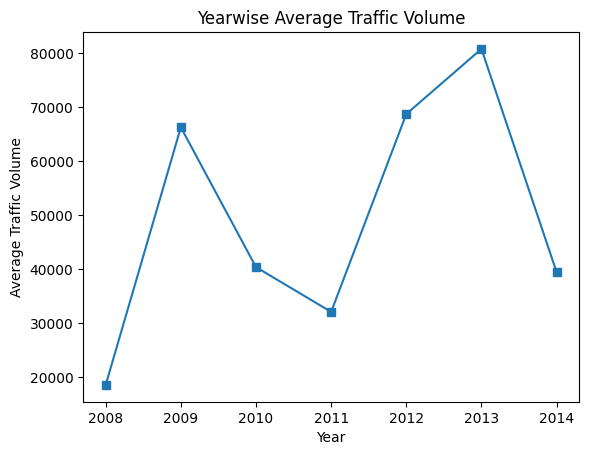

In [20]:
# Create a grouped dataframe
grouped_df = train_copy.groupby("Year").sum()

# Plot the figure
plt.plot(grouped_df.index, grouped_df["Traffic_Vol"]/365, marker="s") # plotting the average for easier understanding
plt.title("Yearwise Average Traffic Volume")
plt.xlabel("Year")
plt.ylabel("Average Traffic Volume")
plt.show()

### Month wise Traffic Volume over the years

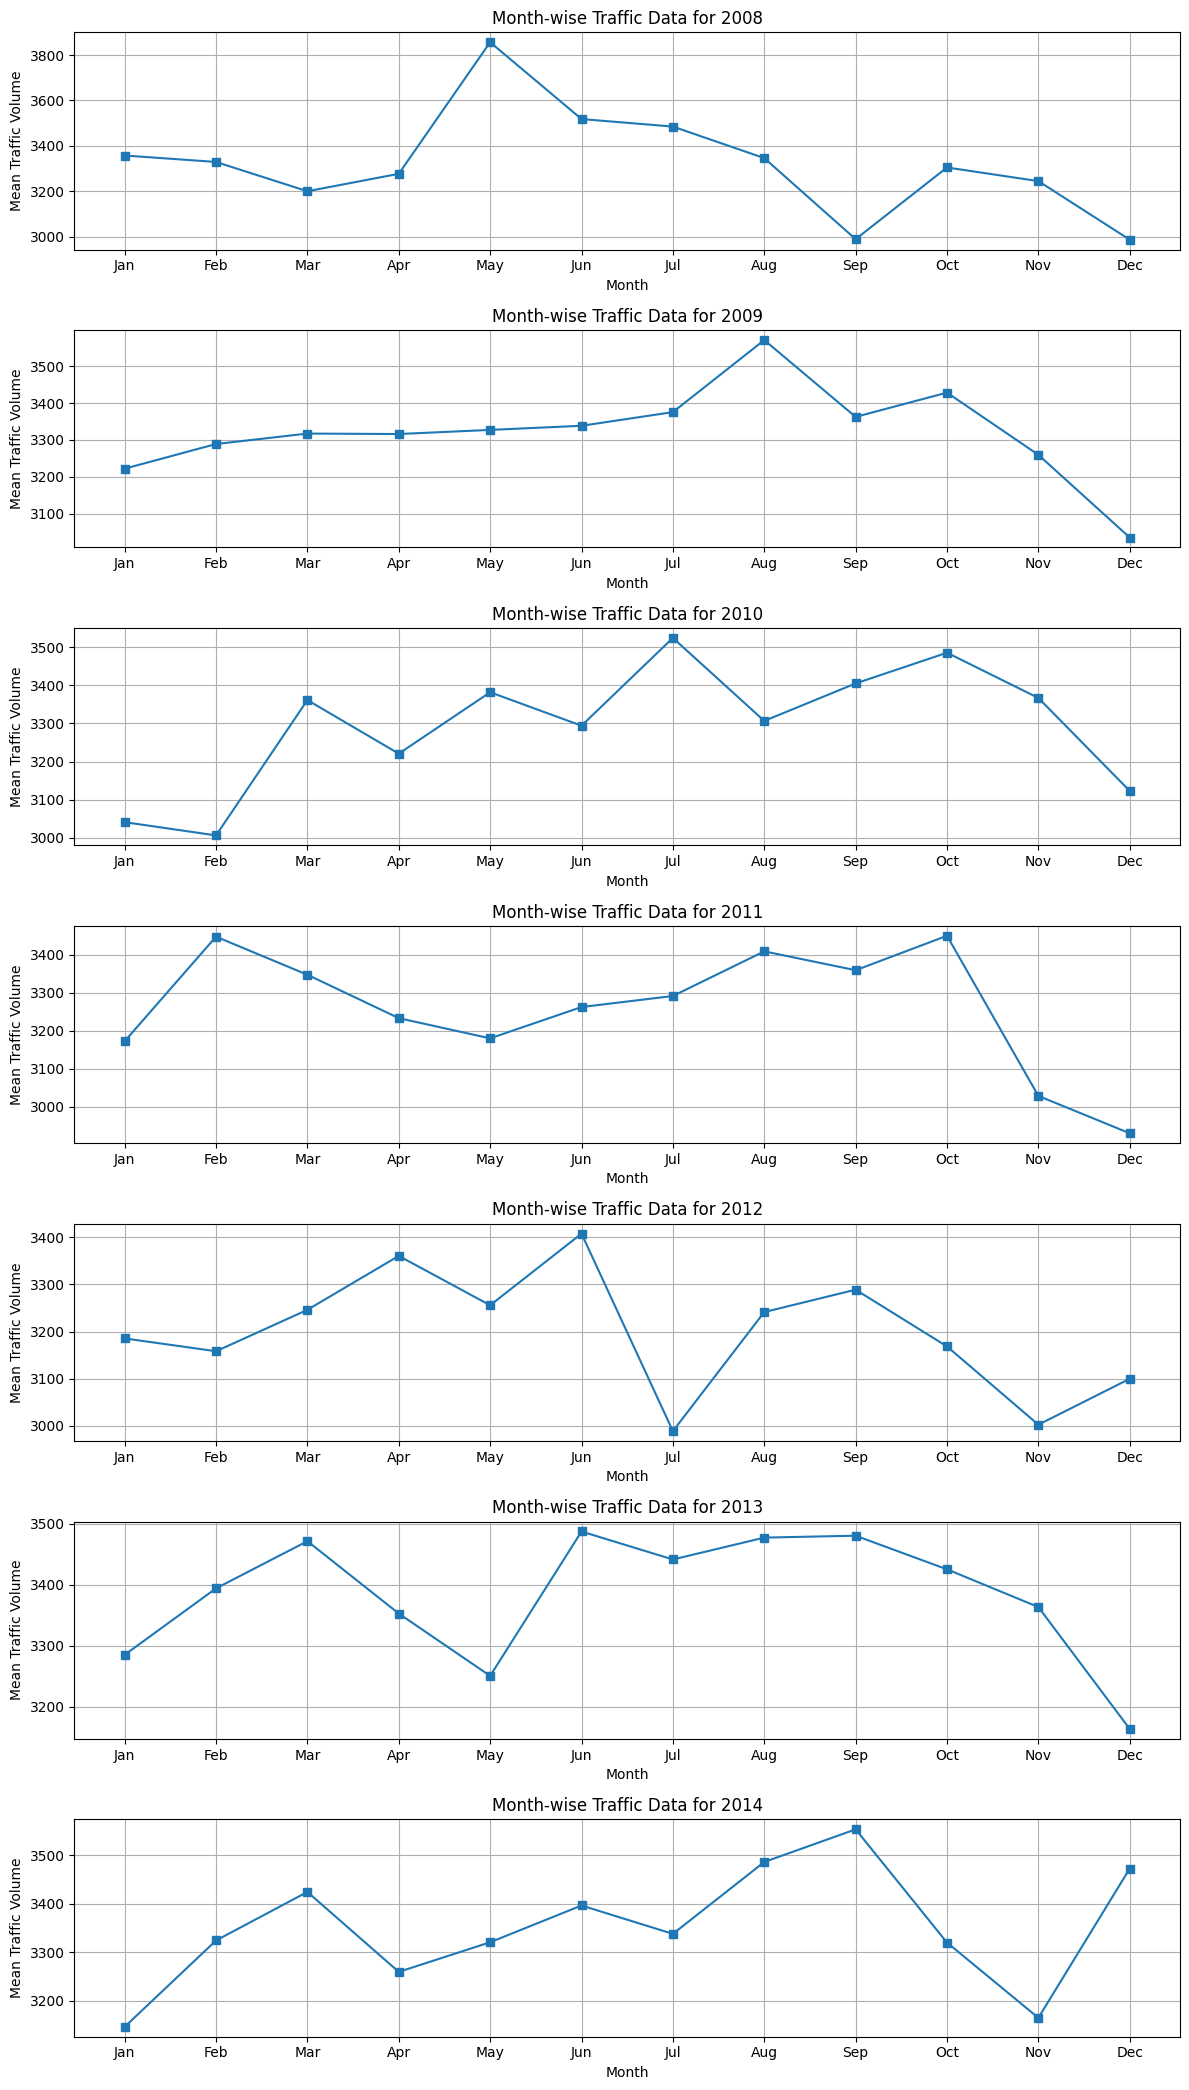

In [21]:
# Create new columns for Year and Month
train_copy["Year"] = train_copy.index.year
train_copy["Month"] = train_copy.index.month

# Group by Year and Month and calculate mean
grouped_month_year = train_copy.drop(cat_columns, axis=1).groupby(["Year", "Month"]).mean()

# Get the unique years
years = grouped_month_year.index.get_level_values('Year').unique()

# Create subplots - one subplot for each year
fig, axes = plt.subplots(len(years), 1, figsize=(12, 3 * len(years)))

# If there's only one subplot, axes is a single object, so convert it to a list for consistency
if len(years) == 1:
    axes = [axes]

# Loop through each year and plot the month-wise data on its respective subplot
for i, year in enumerate(years):
    monthly_data = grouped_month_year.loc[year]
    
    # Plot the data for the current year on the corresponding subplot
    axes[i].plot(monthly_data.index, monthly_data['Traffic_Vol'], label=str(year), marker="s")
        
    # Title and labels for each subplot
    axes[i].set_title(f'Month-wise Traffic Data for {year}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Mean Traffic Volume')
    
    # Set x-axis ticks to show month names
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    # Display grid
    axes[i].grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Traffic over Different Weather Conditions

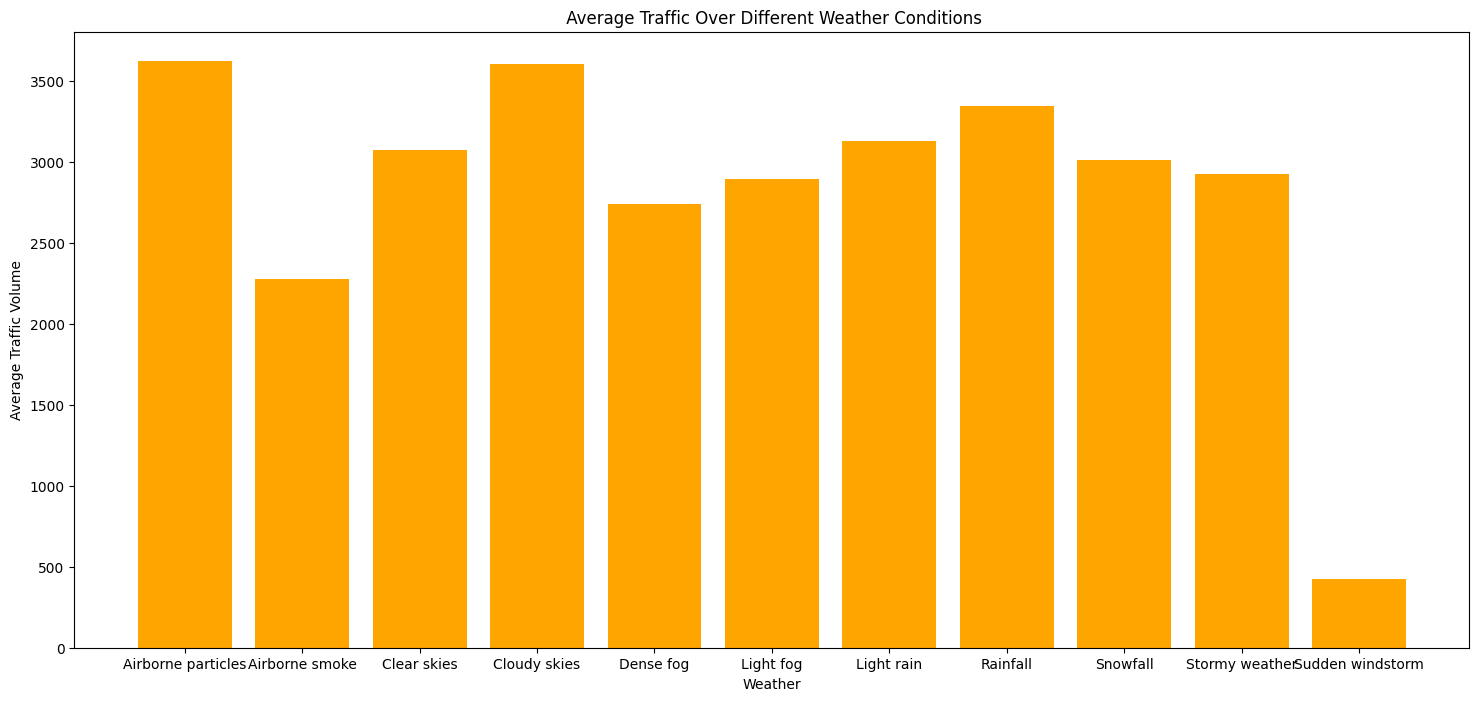

In [22]:
grouped_weather = train_copy.drop('Weather_Desc', axis=1).groupby("Weather").mean()

# Plot the plot
plt.figure(figsize=(18, 8))
plt.bar(grouped_weather.index, grouped_weather["Traffic_Vol"], color="orange")
plt.title(" Average Traffic Over Different Weather Conditions")
plt.xlabel("Weather")
plt.ylabel("Average Traffic Volume")
plt.show()

#### Average Traffic Volume on Holidays

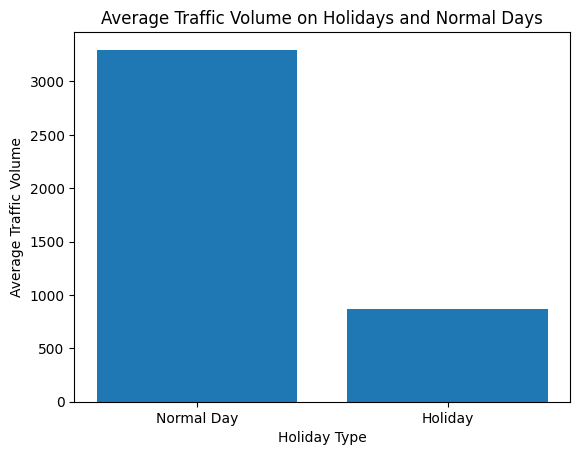

In [23]:
# Group by 'Holiday' and calculate mean
grouped_holidays = train_copy.drop(cat_columns, axis=1).groupby("Holiday").mean()

# Plotting the bar chart
plt.bar(grouped_holidays.index, grouped_holidays["Traffic_Vol"])

# Set x-ticks to correspond to the categories in 'Holiday'
plt.xticks(grouped_holidays.index, ["Normal Day", "Holiday"])

# Title and labels
plt.title("Average Traffic Volume on Holidays and Normal Days")
plt.xlabel('Holiday Type')
plt.ylabel('Average Traffic Volume')

# Display the plot
plt.show()

### Bivariate Analysis

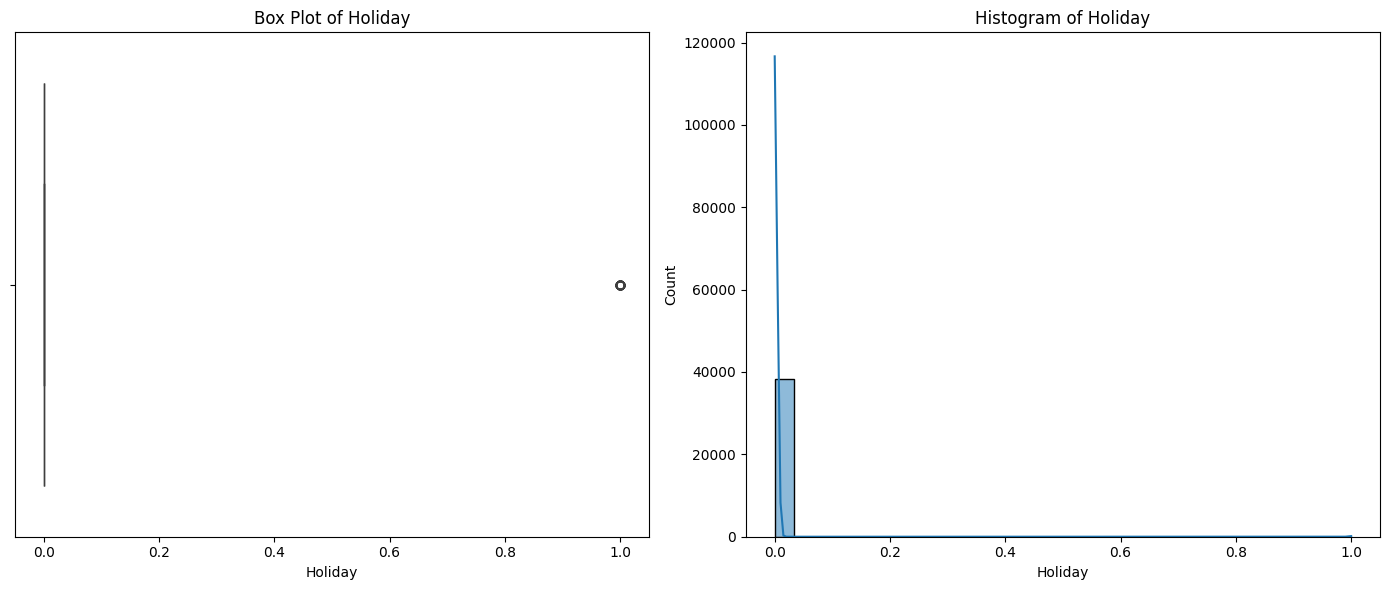

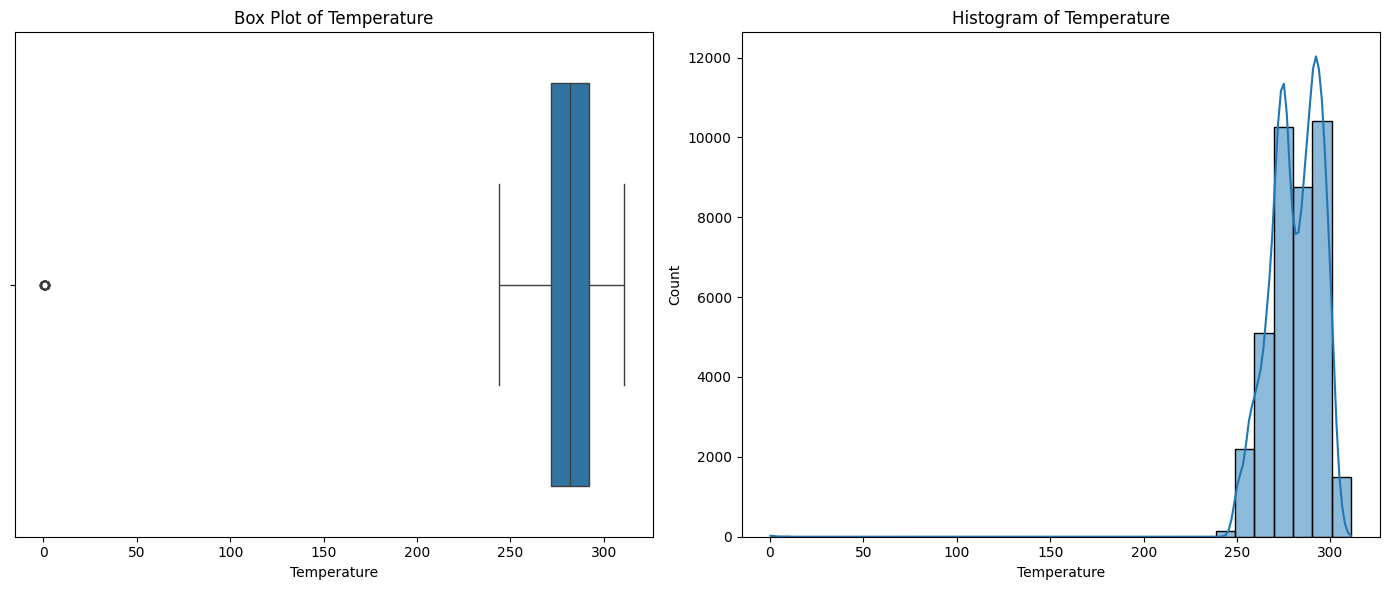

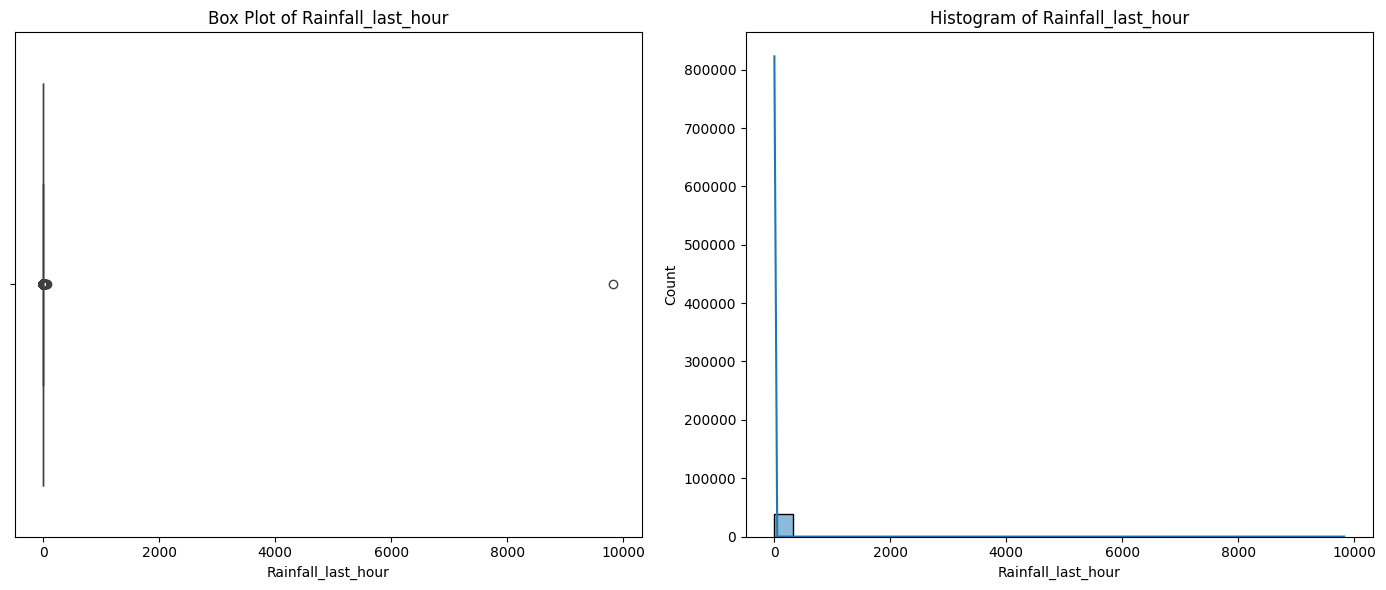

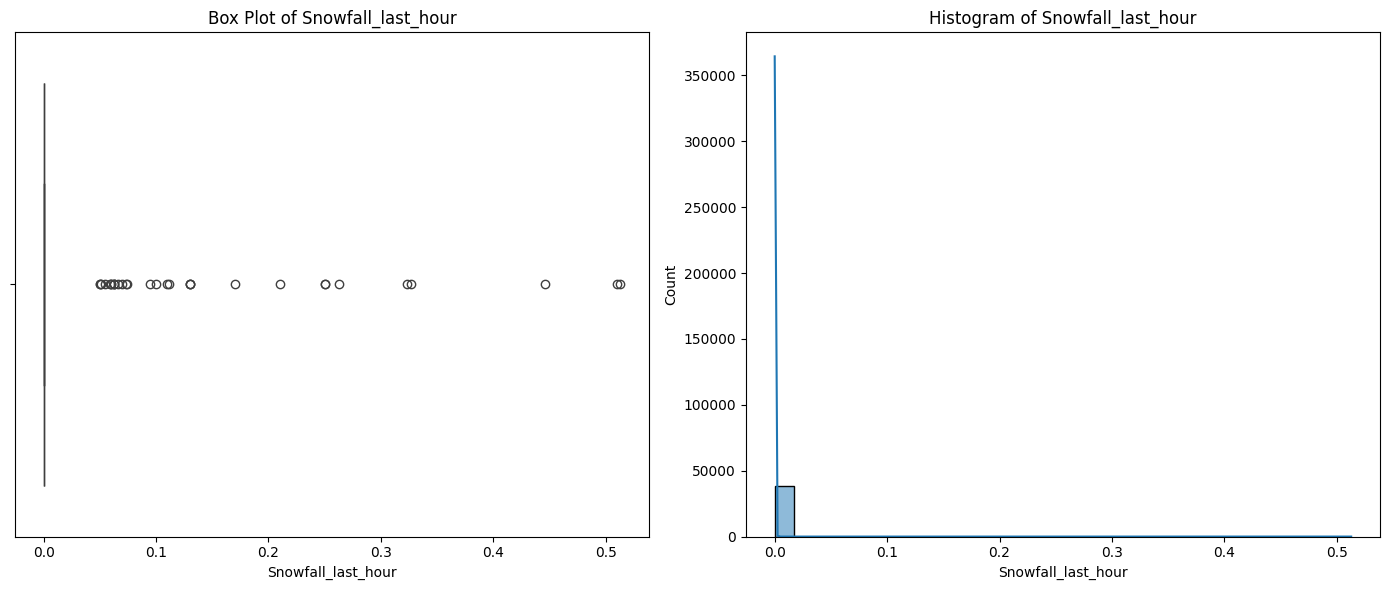

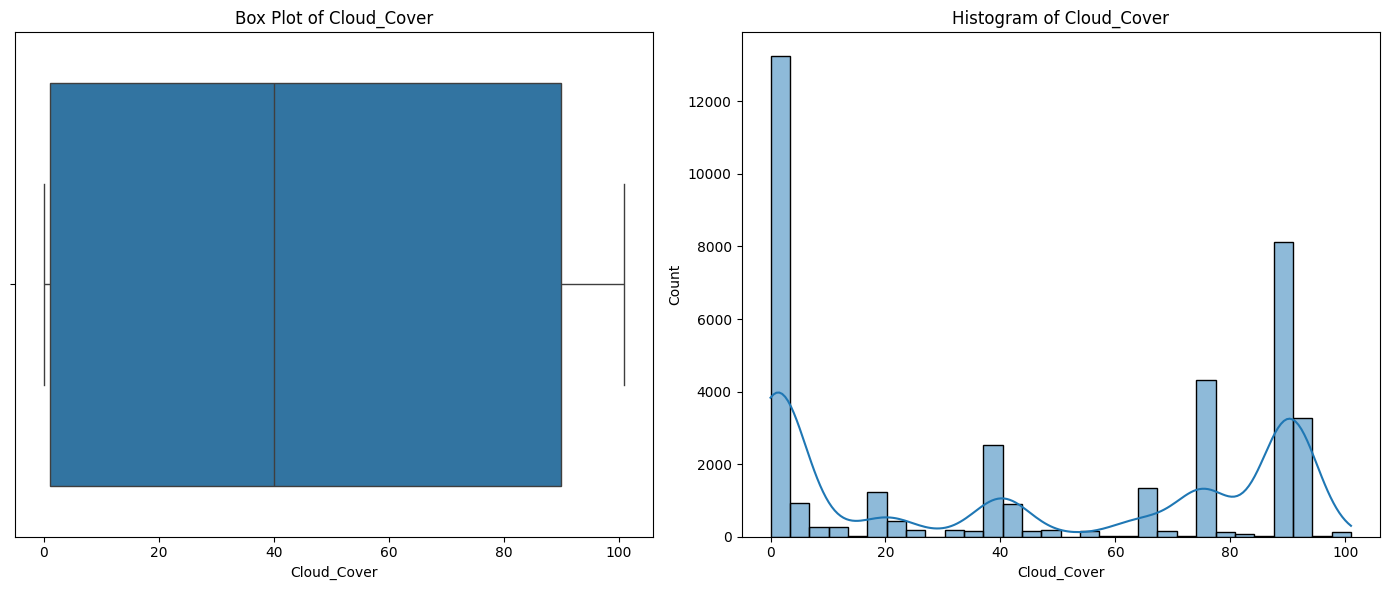

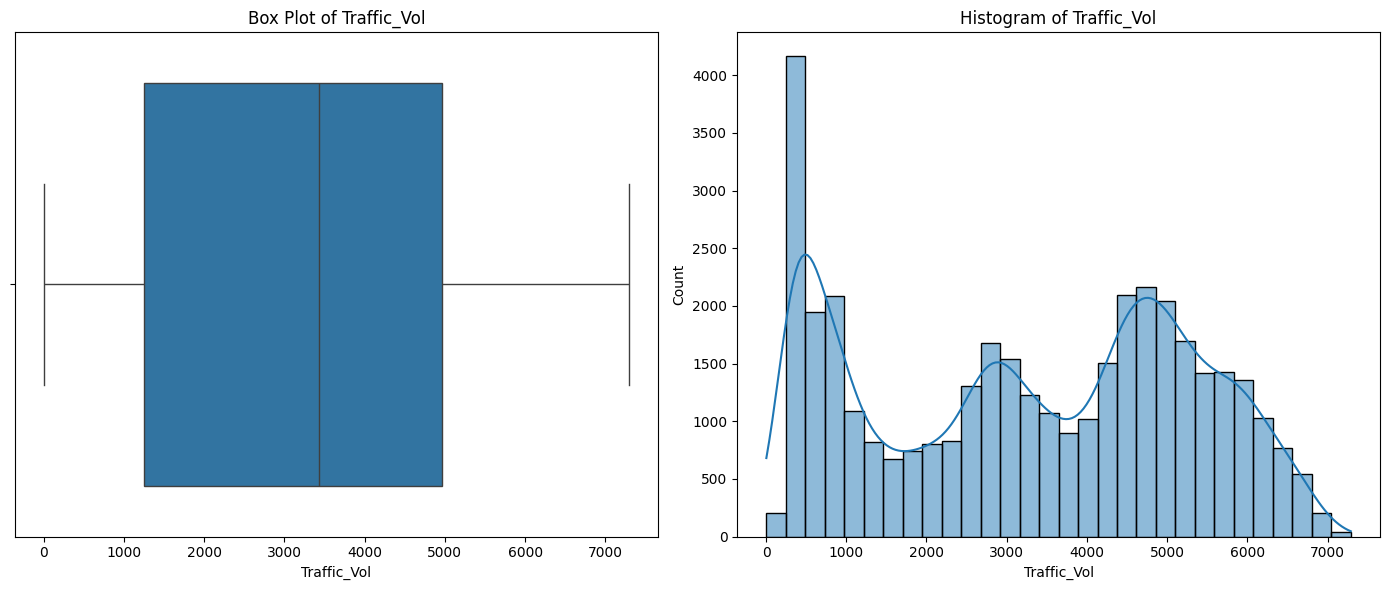

In [24]:
for feature in num_columns:
    plt.figure(figsize=(14, 6))

    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=train, x=feature)
    plt.title(f'Box Plot of {feature}')
    
    # Hist Plot
    plt.subplot(1, 2, 2)
    sns.histplot(data=train, x=feature, kde=True, bins=30)
    plt.title(f'Histogram of {feature}')

    plt.tight_layout()
    plt.show()

### Multivariate Analysis

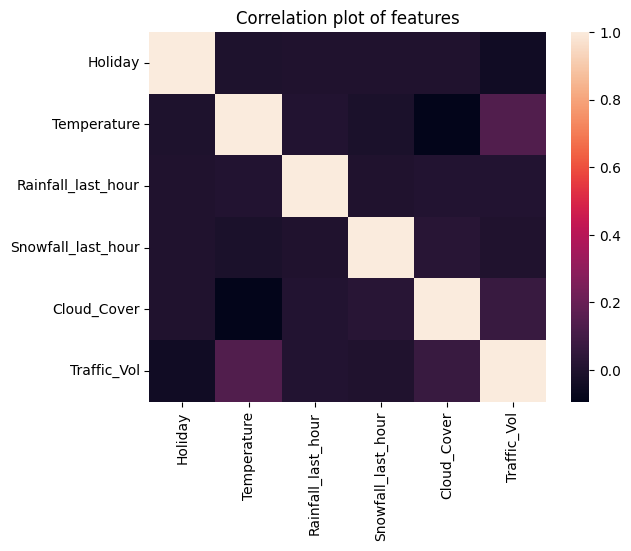

In [25]:
# Plot the correlation plot
sns.heatmap(train.corr(numeric_only=True))
plt.title("Correlation plot of features")
plt.show()

### Convert the categorical columns into numerical columns

In [35]:
# concatenate the train and test sets to avoid mismatch of features (i.e shape of train and  test sets)
data = pd.concat([train, test])

# One hot encode using get dummies method
data = pd.get_dummies(data)

# split back the train and test sets
train_encoded = data.iloc[:len(train), :]
test_encoded = data.iloc[len(train):, :]

data.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Traffic_Vol,Weather_Airborne particles,Weather_Airborne smoke,Weather_Clear skies,Weather_Cloudy skies,...,Weather_Desc_Snowfall,Weather_Desc_Soft rain,Weather_Desc_Steady rain,Weather_Desc_Storm with a light sprinkle,Weather_Desc_Storm with mild rain,Weather_Desc_Storm with rain,Weather_Desc_Stormy weather,Weather_Desc_Strong drizzle,Weather_Desc_Sudden windstorm,Weather_Desc_Torrential downpour
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2008-02-10 09:00:00,0.0,289.28,0.0,0.0,40,5555.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2008-02-10 10:00:00,0.0,290.26,0.0,0.0,75,4525.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2008-02-10 11:00:00,0.0,290.28,0.0,0.0,90,4772.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2008-02-10 12:00:00,0.0,290.33,0.0,0.0,90,5031.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2008-02-10 13:00:00,0.0,292.14,0.0,0.0,75,4928.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [36]:
try:
    assert len(train) == len(train_encoded), f"Train length mismatch: expected {len(train)}, got {len(train_encoded)}"
    assert len(test) == len(test_encoded), f"Test length mismatch: expected {len(test)}, got {len(test_encoded)}"
    print("Both train and test datasets have the correct lengths.")
except AssertionError as e:
    print(f"Assertion Error: {e}")


Both train and test datasets have the correct lengths.


In [38]:
# Save the train and test sets to the disk
import os

os.makedirs("../Dataset/processed", exist_ok=True)

train_encoded.to_csv("../Dataset/processed/train.csv", header=True)
test_encoded.to_csv("../Dataset/processed/test.csv", header=True)